1本目のスパイラル（真の軌道）: [(0.0, 0.0), (-0.09950041652780259, -0.009983341664682815), (-0.19601331556824833, -0.03973386615901225), (-0.2866009467376818, -0.0886560619984019), (-0.3684243976011541, -0.15576733692346023), (-0.4387912809451864, -0.2397127693021015), (-0.495201368945807, -0.33878548403702136), (-0.5353895310991419, -0.45095238106638386), (-0.5573653674777324, -0.5738848727196183), (-0.559448971443598, -0.7049942186647351), (-0.5403023058681398, -0.8414709848078965), (-0.4989557335681351, -0.9803280960675791), (-0.43482930537200815, -1.1184469031606719), (-0.34774847721196356, -1.2526256410423509), (-0.23795400006033715, -1.3796296219838444), (-0.10610580250155435, -1.4962424799060816), (0.046719235682062106, -1.5993177648664083), (0.21903564030239228, -1.6858301777691966), (0.40896377044755683, -1.7529257355807513), (0.6142501770406569, -1.7979701666060877), (0.8322936730942848, -1.8185948536513634), (1.060176819659701, -1.8127396699626348), (1.294702457961761, -1.7786920884030983

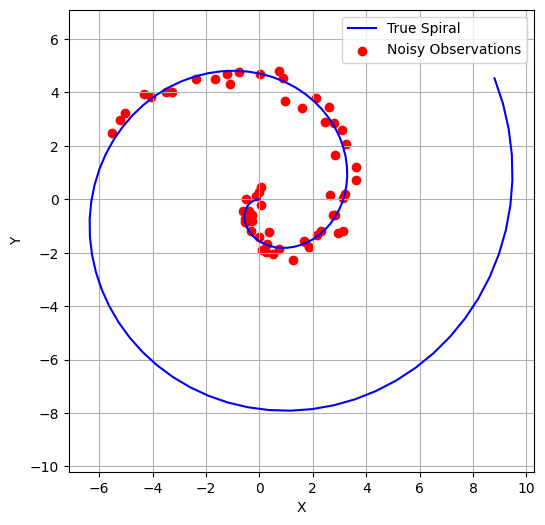

In [2]:


import math #数学関数(sin,cosなど)
import random #乱数


# ## スパイラルの構築
# - スパイラルの式（極座標）： r=a+bΘ
# - rは半径,Θは角度

#ライブラリ無しで「0~6π」をn個に分けたい
def linspace(start,stop,num):
    if num==1:
        return [start]
    step=(stop-start)/(num-1)
    return[start+i*step for i in range(num)]


linspace(0,6,5)

#スパイラルの座標を計算する
def generate_spiral_points (ntotal,a,b):
    points=[] #座標を入れる箱
    for i in range(ntotal):
        theta = i * 0.1  # θを少しずつ大きくする（0.1ラジアン刻み）
        r=a+b*theta
        x=r*math.cos(theta)
        y=r*math.sin(theta)
        points.append((x,y)) # 「~.append」でリストの末尾に要素を追加。ここではpointsリストの末尾に要素を加えていく    
    return(points)



# ノイズを加える関数を作る
# 正規分布ノイズをライブラリ無しで作るにはBox-Muller法を使う
def gaussian_noise(std):
    u1=random.random() # ランダム関数発動。「random.random()」で、0.0以上1.0未満の浮動小数点数の乱数を生成
    u2=random.random()
    z=math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    return z*std


# ランダムな一部をサンプルしてノイズを加える
def sample_with_noise(points,nsample,noise_std):
    if nsample > len(points):
        raise ValueError(f"nsample（{nsample}）はデータ数（{len(points)}）以下にしてください。")
    #start_index=random.randint(0,len(points)-nsample) # random.randint(a,b)で、a<=n<=bの範囲のランダムな整数を返す
    start_index = 0  #ノイズデータの始点を(0,0)からに固定
    sampled=[] # ノイズを加えたデータを入れる箱
    for i in range(start_index,start_index+nsample):
        x,y=points[i] #pointsリストのi番目の要素の座標をx,yにそれぞれ代入
        x +=gaussian_noise(noise_std) #関数gaussian_noise発動
        y +=gaussian_noise(noise_std)
        sampled.append((x,y))
    return sampled


# 全部まとめて関数化する
def generate_spiral_data(nspiral=1,ntotal=100,nsample=60,a=0,b=1,noise_std=0.25): 
    # 「nspiral」はスパイラルの本数,「ntotal」は正解スパイラルのデータ点の数,「nsample」はノイズ付きデータのデータ点の数
    #「a,b」はスパイラル生成で使う変数,「noise_std」はノイズ付きデータを作るときに使うばらつきの強度。値が大きくなるとばらつきも大きい
    
    
    if nsample > ntotal:
        raise ValueError(f"nsample({nsample}) は ntotal({ntotal}) 以下にしてください。")

    all_true=[] # 教師データ
    all_obs=[] # 観測データ（Observation）
    for _ in range(nspiral): # 「for _ in range(ooo)」は「for i in range(ooo)」のように書いてもOKです。 変数名が「_」になっているだけです。
        is_ccw = random.random()>0.5  #50％の確率で時計回りor反時計回り。is_ccw（is counter-clockwise）は、ランダムに True（反時計）か False（時計）を選びます。
        sign = 1 if is_ccw else -1 # 条件式が真のときに評価される式 if 条件式 else 条件式が偽のときに評価される式。
        spiral=generate_spiral_points(ntotal,a,b*sign) #関数generate_spiral_points発動
        obs=sample_with_noise(spiral,nsample,noise_std) #関数sample_with_noise発動
        all_true.append(spiral)
        all_obs.append(obs)
    return all_true,all_obs


true_paths, noisy_samples = generate_spiral_data()
print("1本目のスパイラル（真の軌道）:", true_paths[0])
print("1本目の観測データ（ノイズあり）:", noisy_samples[0])


import matplotlib.pyplot as plt


# 描画する前にデータを整理
def data_cleaning(true_paths,noisy_samples):
    for i in range(len(true_paths)):
        true=true_paths[i]
        noisy=noisy_samples[i]

        true_x=[p[0] for p in true] #リスト内包表記。trueの中のすべての点pから、x座標（p[0]）だけを取り出してリストにする
        true_y=[p[1] for p in true] #「for p in true」はtrueというリストの中から要素をpに取り出す

        noisy_x=[p[0] for p in noisy]
        noisy_y=[p[1] for p in noisy]
    return true_x,true_y,noisy_x,noisy_y
        
true_x,true_y,noisy_x,noisy_y=data_cleaning(true_paths, noisy_samples) #data_cleaning関数発動して各変数に代入
plt.figure(figsize=(6,6)) #「plt.figure」で新しい図（キャンバス）を作る。figsize=(o,o)でサイズ指定(単位はインチ)
plt.plot(true_x,true_y,label='True Spiral',color='blue')
plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数

plt.xlabel('X')
plt.ylabel('Y')
plt.legend() #上で指定した、label="○○"で付けた名前を表示してくれる
plt.axis('equal') #スケールを同じにする
plt.grid(True) #グリッド線を引くか
plt.show() #これを言わんと出力されん













Step 0, Loss 7.1943


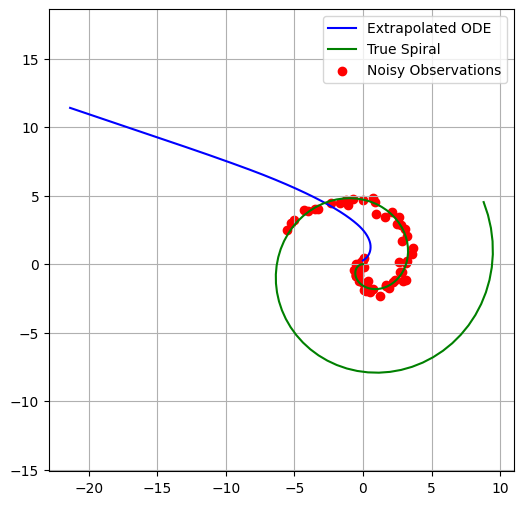

Step 0, Loss 6.3205


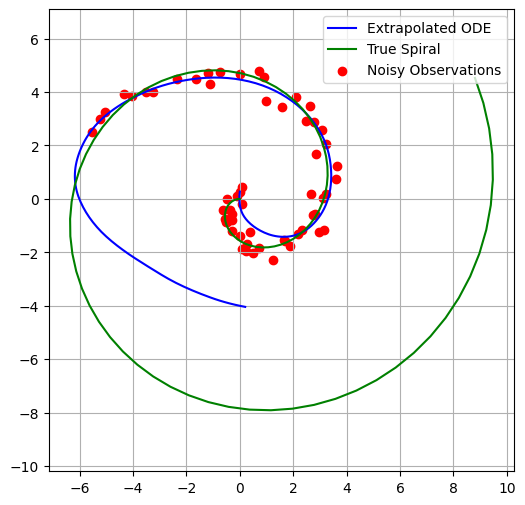

Step 0, Loss 8.2258


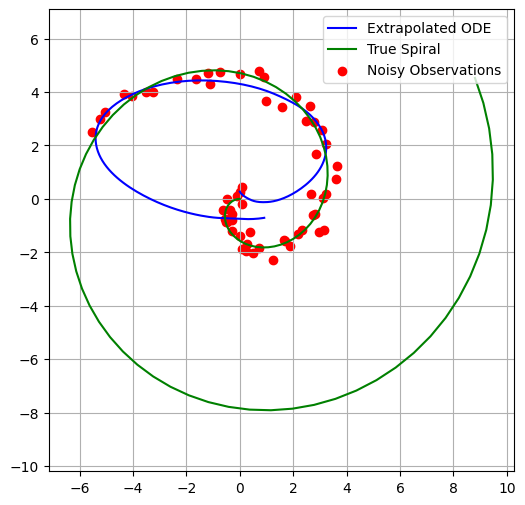

Step 0, Loss 7.1784


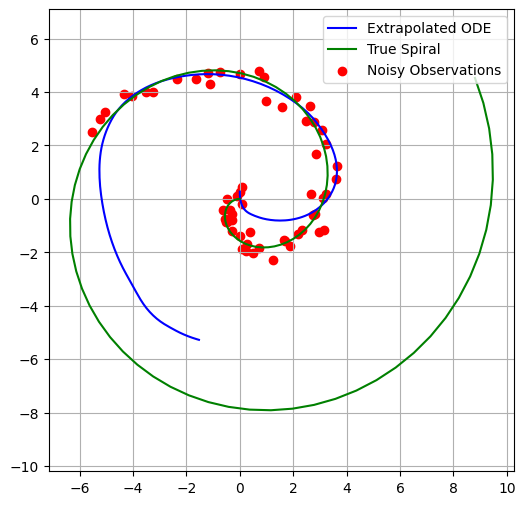

In [3]:
import torch
import pandas as pd


all_result=[]# すべての外挿結果を格納するリスト
for j in range(4):
    # 観測データの整形
    # 時間の配列。stepsは観測点数。つまりノイズデータの数

    #回帰実験用↓
    # t=torch.linspace(0,6,steps=60) #torch.linspace(開始,終了,oo分割)でtensorの配列を作る

    # 外挿用↓
    # t_train = torch.linspace(0, 6, steps=120)←この行は無視
    t_train =torch.linspace(0,6,steps=60)  # 60ステップに修正

    #回帰用
    #データ整形（バッチ×時刻×次元数）
    # x=torch.tensor(noisy_samples[0],dtype=torch.float32) # 1つ目のスパイラル観測点
    # x=x.unsqueeze(0) #

    # 外挿用
    x_train = torch.tensor(noisy_samples[0], dtype=torch.float32).unsqueeze(0)




    import torch.nn as nn

    # dy/dt = f(y, t) の f をNNで定義
    class ODEFunc(nn.Module):
        def __init__(self):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(2, 50),
                nn.ReLU(),
                # nn.Tanh(),
                nn.Linear(50, 2),
            )

        def forward(self, t, y):
            return self.net(y)



    from torchdiffeq import odeint

    # ODEFuncをインスタンス化
    func = ODEFunc()


    # 初期状態(回帰用)（時刻t=0での位置）を決める
    # y0 = x[:, 0, :]  # shape: (1, 2)

    # 初期状態(外挿用)（時刻t=0での位置）を決める
    y0 = x_train[:, 0] # [:,x]スライス構文。「:」はすべての要素を取るの意味。xは何列目かを表す。つまりこの場合、x_trainのリストの内、0列目をすべて取るの意味
    # 最初の時刻の観測点（形状は [1, 2]）


    # ODEを解いて系列を得る（tに沿って解く）回帰用↓
    # pred_y = odeint(func, y0, t)  # shape: (30, 1, 2)
    # pred_y = pred_y.permute(1, 0, 2)  # shape: (1, 30, 2)




    optimizer = torch.optim.Adam(func.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()

    """
    #回帰用
    for itr in range(1000):
        optimizer.zero_grad()
        pred_y = odeint(func, y0, t).permute(1, 0, 2)
        loss = loss_fn(pred_y, x)
        loss.backward()
        optimizer.step()


        if itr % 100 == 0:
            print(f"Step {itr}, Loss {loss.item():.4f}")
        
    pred_x = pred_y[0].detach().numpy()    
    """

    # 外挿用
    for itr in range(100):
        optimizer.zero_grad()
        pred_y = odeint(func, y0, t_train) #[60, 1, 2]
        pred_y = pred_y.permute(1, 0, 2) #[1, 60, 2]
        loss = loss_fn(pred_y, x_train)
        loss.backward()
        optimizer.step()
        
        if itr % 100 == 0:
            print(f"Step {itr}, Loss {loss.item():.4f}")
    t_extrapolate = torch.linspace(0, 10, steps=200)  # 外挿の時間範囲
    pred_y_extrapolated = odeint(func, y0, t_extrapolate).squeeze(1).detach().numpy() # 外挿予測した結果を格納

    # print(j+1,"回目外挿予測結果データ:",pred_y_extrapolated)
    df = pd.DataFrame(pred_y_extrapolated,columns=["x","y"])
    df["試行回数"]=j+1# 何回目の繰り返しかを記録
    all_result.append(df)



    plt.figure(figsize=(6, 6))

    #回帰用↓
    # plt.plot(pred_x[:, 0], pred_x[:, 1], label="Fitted ODE", color='blue')

    # 外挿用↓
    plt.plot(pred_y_extrapolated[:, 0], pred_y_extrapolated[:, 1], label="Extrapolated ODE", color='blue')

    plt.plot(true_x,true_y,label='True Spiral',color='green')
    plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# 4回分を1つのDataFrameにまとめる
all_result_df = pd.concat(all_result, ignore_index=True)# 新しいindexを0から順に振り直す（重複なし）

# CSVファイルに保存
all_result_df.to_csv("pred_y_extrapolated_all.csv", index=False, encoding="utf-8")# 「index=False にするのは、余分なインデックス列を省くため」

# 各回の平均を取って一つの結果を出す



In [ ]:
df = pd.read_csv("pred_y_extrapolated_all.csv")# csv読み込み
x_array=df["x"].values # pred_y_extrapolated_all.csvのうちxの要素をnumpy配列として格納。これで配列と同じような計算ができる  
y_array=df["y"].values
x_sum=0
y_sum=0
all_ave=[]# すべての平均結果を入れるリスト
for k in range (0,601,200):
    x_sum+=x_array[k]
    y_sum+=y_array[k]

x_ave=x_sum/4
y_ave=y_sum/4
all_ave.append([x_ave,y_ave])
print(all_ave)
# いったん一行目だけの平均出した。
# 出力に[[np.float64(-0.0010858196), np.float64(0.271589)]]となる理由はまだわからない。チャッピーに質問中    



[[np.float64(-0.0010858196), np.float64(0.271589)]]
